After completing this tutorial, you will be able to:

- Calculate NDVI using NAIP multispectral imagery in Python.
- Export or write a raster to a .tif file from Python.

## How to Derive the NDVI Vegetation Index From Multispectral Imagery
#### (NIR - Red) / (NIR + Red)

You can perform this calculation using matrix math with the numpy library.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [2]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

# View shape of the data
naip_data.shape

(4, 2312, 4377)

Calculate NDVI using regular numpy array math. In this case, the bands you are subtracting come from the same data file. The tif file format requires that all layers are in the same CRS and of the same size so you assume the data line up. Thus you do not need to test the data for **equal shape, crs and extent**.

In [6]:
naip_ndvi = (naip_data[3]-naip_data[0])/(naip_data[3]+naip_data[0])

Finally plot the data. Note below that the vmin= and vmax= arguments are used to stretch the colorbar across the full possible range of NDVI values (-1 to 1).

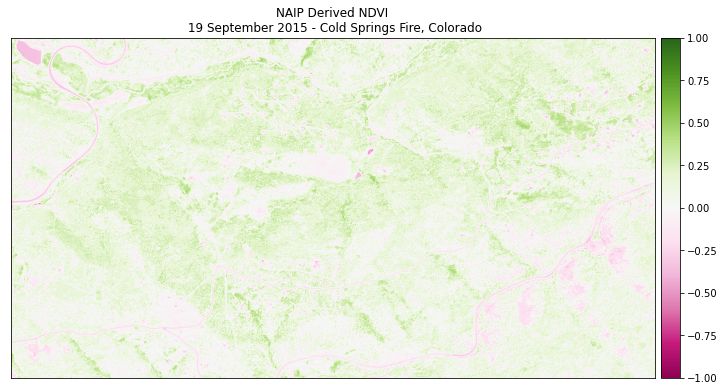

In [7]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

#### View Distribution of NDVI Values
Using a histogram, you can view the distribution of pixel values in your NDVI output.

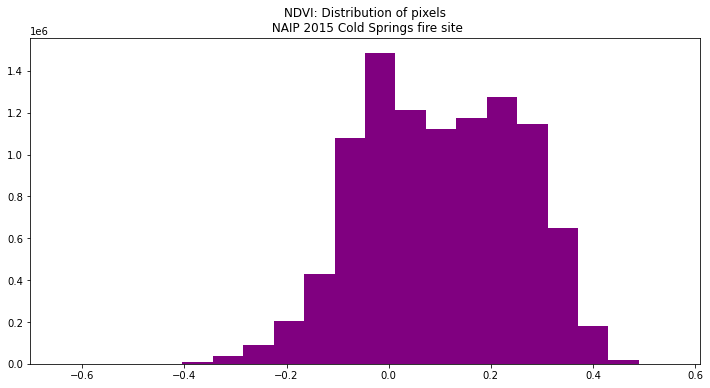

In [8]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

## Optional - Export a Numpy Array to a Raster Geotiff in Python
When you are done, you can export your NDVI raster data so you could use them in QGIS or ArcGIS or share them with your colleagues. To do this, you use the** xarray_name.rio.to_raster()** function.

You can view the type of data stored within the ndvi array using .dtype. Remember that the naip_ndvi object is a xarray DataArray.

In [14]:
type(naip_ndvi), naip_ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float64'))

Note below that when we write the raster, we use the custom outpath that we make to write it out to a filename and location of our choice.

In [15]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

# Write your the ndvi raster object
naip_ndvi.rio.to_raster(naip_ndvi_outpath)